In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [37]:
#import dataset
iris = datasets.load_iris()
x = iris.data[:,2:4]
y = iris.target

In [38]:
# Creating the model
C=1.0 # SVM regularization parameter

svm1 = svm.SVC(kernel="linear", C=C, gamma='auto').fit(x,y)

/var/folders/19/m7k2gszn1mx890gcszp_6xth0000gn/T/ipykernel_5694/2040989952.py:11: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contour(xx,yy,z,cmp=plt.cm.Paired, alpha=.8)


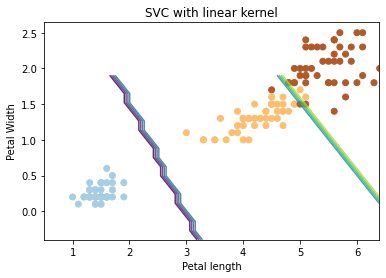

In [39]:
# Create mesh to plot the sample
x_min, x_max = x[:,0].min()-.5, x[:,0].max()-.5
y_min, y_max = x[:,1].min()-.5, x[:,1].max()-.5

h = (x_max/x_min)/100

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
plt.subplot(111)
z=svm1.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contour(xx,yy,z,cmp=plt.cm.Paired, alpha=.8)
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.xlim(xx.min(),xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [40]:
# dividing data into testing and training and testing and train your model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2,random_state=42)
svc1 = svm.SVC(kernel='linear',C=1,gamma='auto').fit(x_train,y_train)

In [41]:
#evaluating performance of the model using the testing dataset
classification_results = svc1.predict(x_test)

print(metrics.classification_report(classification_results,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/emmanuelhilliard/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


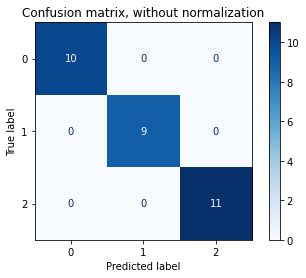

In [42]:
title_option = [("Confusion matrix, without normalization", None)]

for title, normalize in title_option:
    disp = plot_confusion_matrix(svc1,x_test,y_test,cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)